## Assignment 6: weather

Get the data from: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Plot:

~~The temperature~~  
~~The mean temperature each day~~   
~~The mean temperature for each month~~  
60% of the marks will be given for the above  

For the last 40%

Plot:

~~The Windspeed (there is data missing from this column) ~~  
~~The rolling windspeed (say over 24 hours)~~  
~~The max windspeed for each day~~  
The monthly mean of the daily max windspeeds (yer I am being nasty here)  
You do not need to over comment your code. Marks will be given for how nice the plots are.  

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
relevant_column_names = ['date', 'temp', 'wdsp']
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', usecols=relevant_column_names, skiprows=23)
print(df.columns)

#print(df.dtypes) used for checking data types in columns after reading in csv file

Index(['date', 'temp', 'wdsp'], dtype='object')


C:\Users\angel\AppData\Local\Temp\ipykernel_10636\2765324071.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', usecols=relevant_column_names, skiprows=23)


In [242]:
df['date']= pd.to_datetime(df['date'], dayfirst=True) # converting the date field to a datetime series
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')  # Using 'coerce' to catch errors in the conversion to numeric datatype, converting so that we can remove empty entries later for the windspeed plot 
print(df.dtypes)

clean_wdsp = df['wdsp'].dropna()
print (clean_wdsp)

df.set_index('date', inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_10636\380010926.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']= pd.to_datetime(df['date'], dayfirst=True) # converting the date field to a datetime series


date    datetime64[ns]
temp           float64
wdsp           float64
dtype: object
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
247669    5.0
247670    5.0
247671    4.0
247672    6.0
247673    6.0
Name: wdsp, Length: 247624, dtype: float64


Text(0, 0.5, 'Temperature')

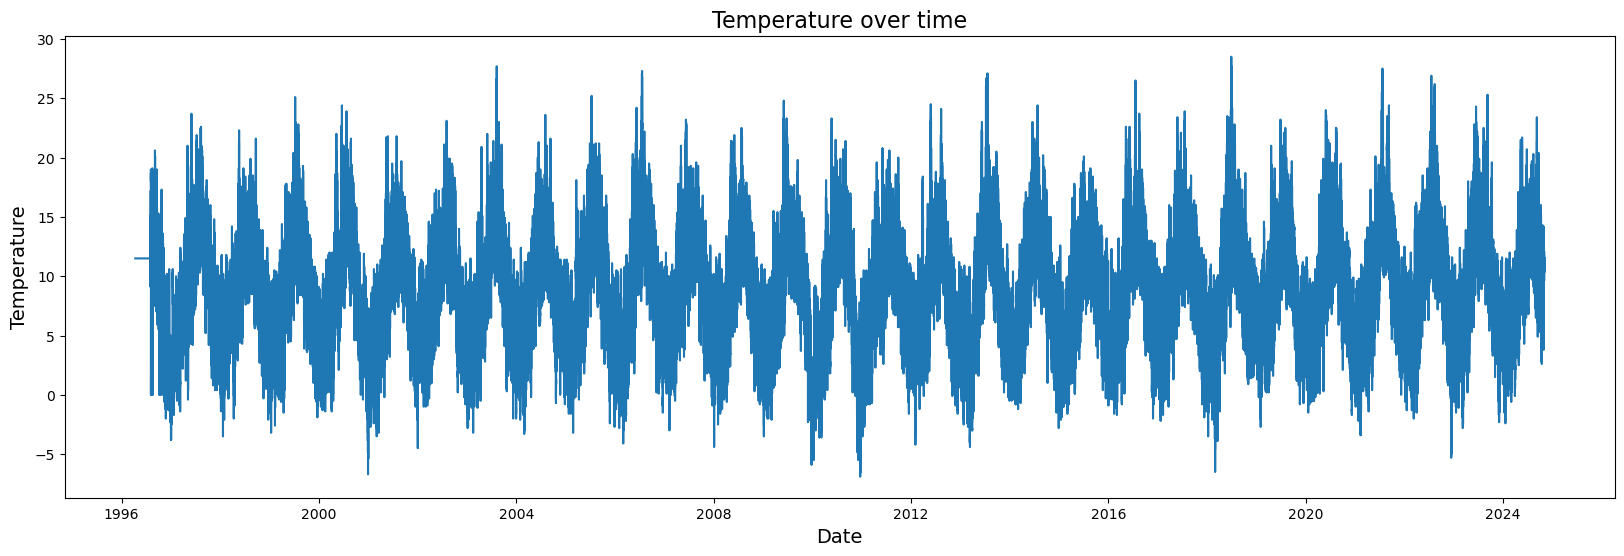

In [254]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x='date', y='temp')
plt.title('Temperature over time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

In [244]:
rs = df.resample('1D')  # resamples the entire data frame per day

In [245]:
# Resample the DataFrame to daily frequency
rs_mean_day = rs.mean()  # Use mean aggregation for numeric columns
# Remove rows where 'temp' is NaN
rs_mean_day = rs_mean_day[rs_mean_day['temp'].notna()]
print(rs_mean_day)

                 temp      wdsp
date                           
1996-04-10  11.500000  0.000000
1996-07-31  12.650000  0.000000
1996-08-01  11.666667  9.956522
1996-08-02  12.504167  7.625000
1996-08-03  14.266667  6.666667
...               ...       ...
2024-10-28  11.487500  8.500000
2024-10-29  10.445833  3.208333
2024-10-30  10.983333  5.458333
2024-10-31  10.554167  5.500000
2024-11-01   9.700000  6.000000

[10322 rows x 2 columns]


Text(0, 0.5, 'Mean temperature per day')

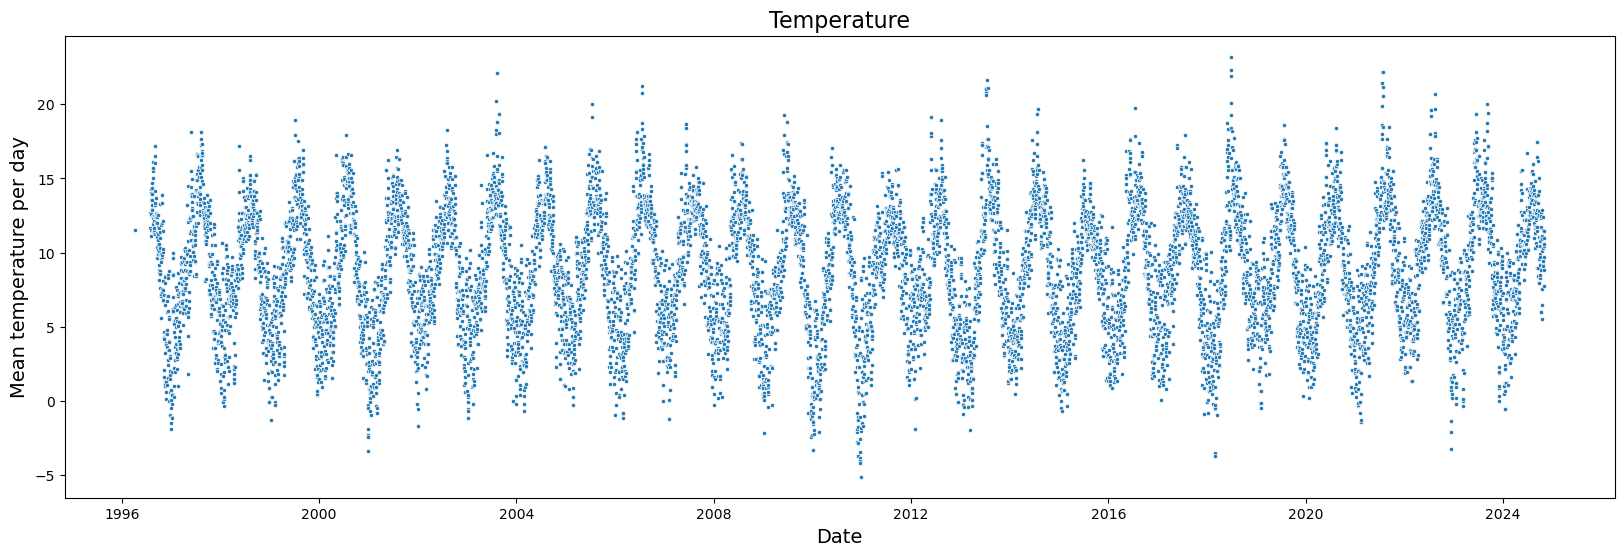

In [256]:
plt.figure(figsize=(20, 6))  
sns.scatterplot(data=rs_mean_day, x='date', y='temp', marker='.')
plt.title('Temperature', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean temperature per day', fontsize=14)

Text(0, 0.5, 'Temperature')

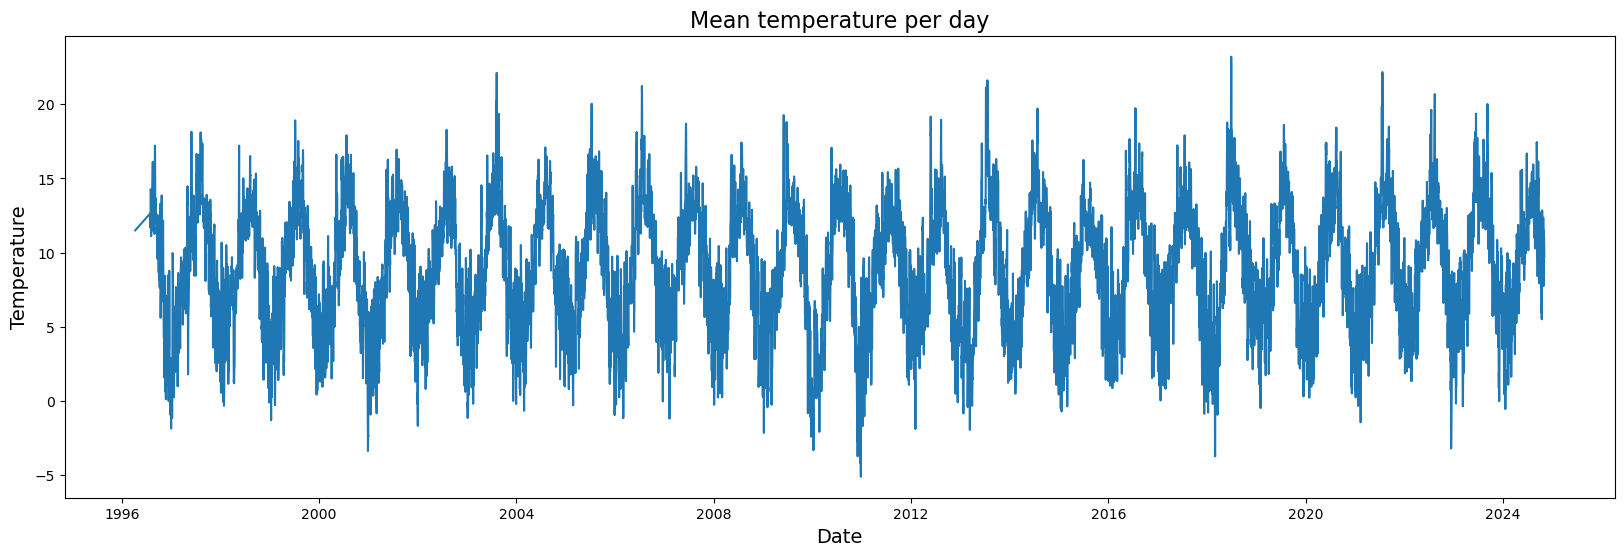

In [257]:
plt.figure(figsize=(20, 6))  
sns.lineplot(data=rs_mean_day, x='date', y='temp')
plt.title('Mean temperature per day', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

In [248]:
rs_month = df.resample('1ME')  # resamples the entire data frame

# Resample the DataFrame to daily frequency
rs_mean_month = rs_month.mean()  # Use mean aggregation for numeric columns

# Remove rows where 'temp' is NaN
rs_mean_month = rs_mean_month[rs_mean_month['temp'].notna()]

print(rs_mean_month)

                 temp       wdsp
date                            
1996-04-30  11.500000   0.000000
1996-07-31  12.650000   0.000000
1996-08-31  12.946909   8.397039
1996-09-30  12.174306   8.037552
1996-10-31   9.614113  11.702279
...               ...        ...
2024-07-31  12.994489   7.654570
2024-08-31  13.233333   9.504032
2024-09-30  11.741389   8.302778
2024-10-31   9.966263   8.520161
2024-11-30   9.700000   6.000000

[342 rows x 2 columns]


Text(0, 0.5, 'Temperature')

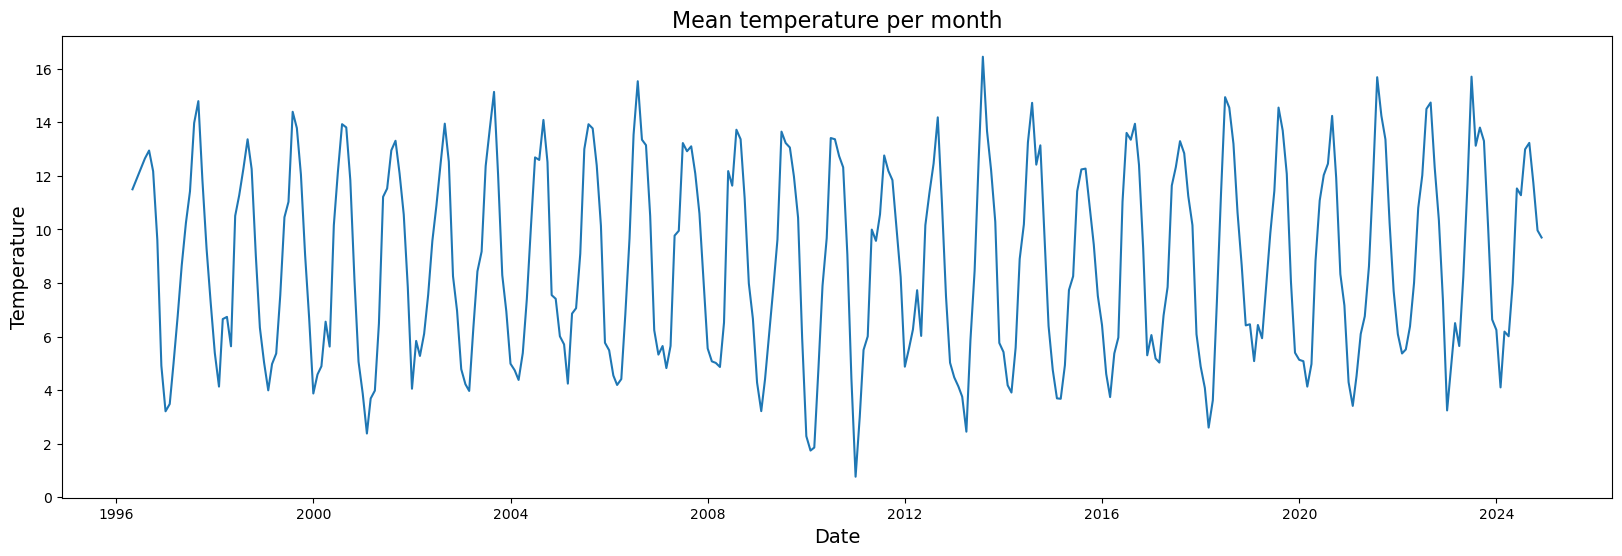

In [249]:
plt.figure(figsize=(20, 6))  
sns.lineplot(data=rs_mean_month, x='date', y='temp')
plt.title('Mean temperature per month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

Text(0, 0.5, 'Wind Speed (m/s)')

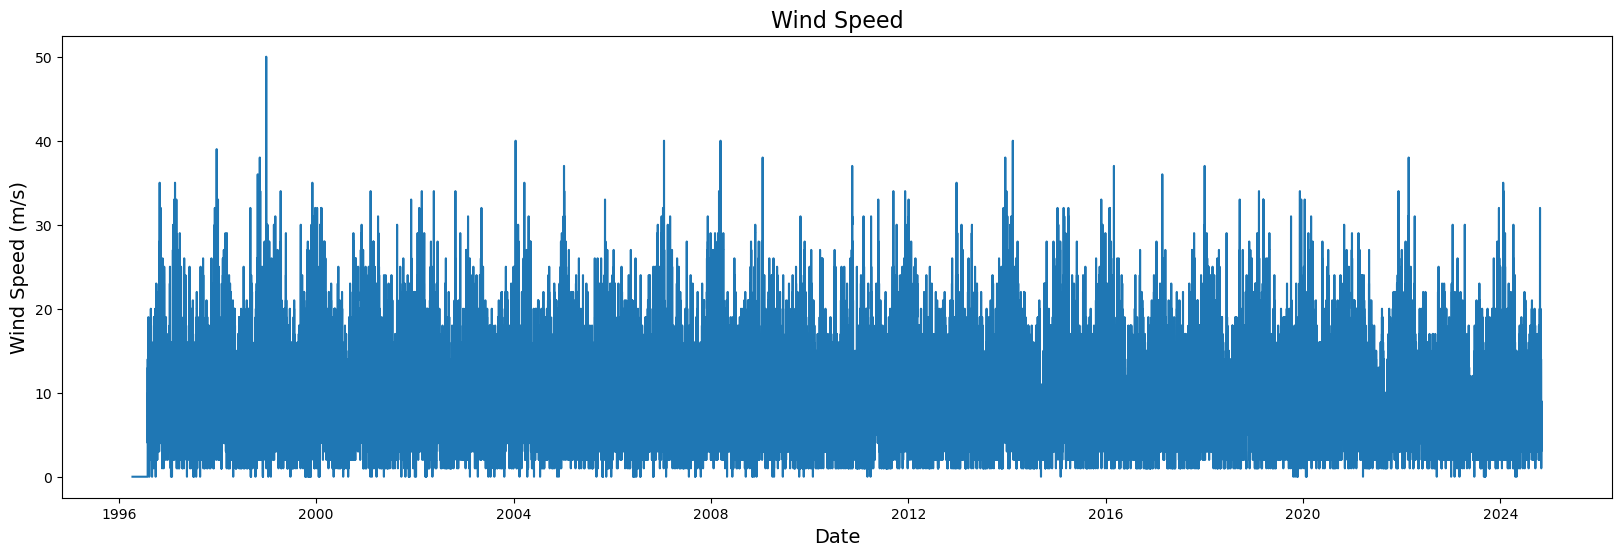

In [250]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x='date', y='wdsp')
plt.title('Wind Speed', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)

In [251]:
df['wdsp_rolling_24h'] = df['wdsp'].rolling(window='24h').mean()
print (df['wdsp_rolling_24h'])

date
1996-04-10 14:00:00    0.000000
1996-07-31 08:00:00    0.000000
1996-07-31 09:00:00    0.000000
1996-07-31 10:00:00    0.000000
1996-07-31 11:00:00    0.000000
                         ...   
2024-10-31 20:00:00    5.916667
2024-10-31 21:00:00    5.791667
2024-10-31 22:00:00    5.583333
2024-10-31 23:00:00    5.500000
2024-11-01 00:00:00    5.500000
Name: wdsp_rolling_24h, Length: 247674, dtype: float64


Text(0, 0.5, 'Wind Speed (m/s)')

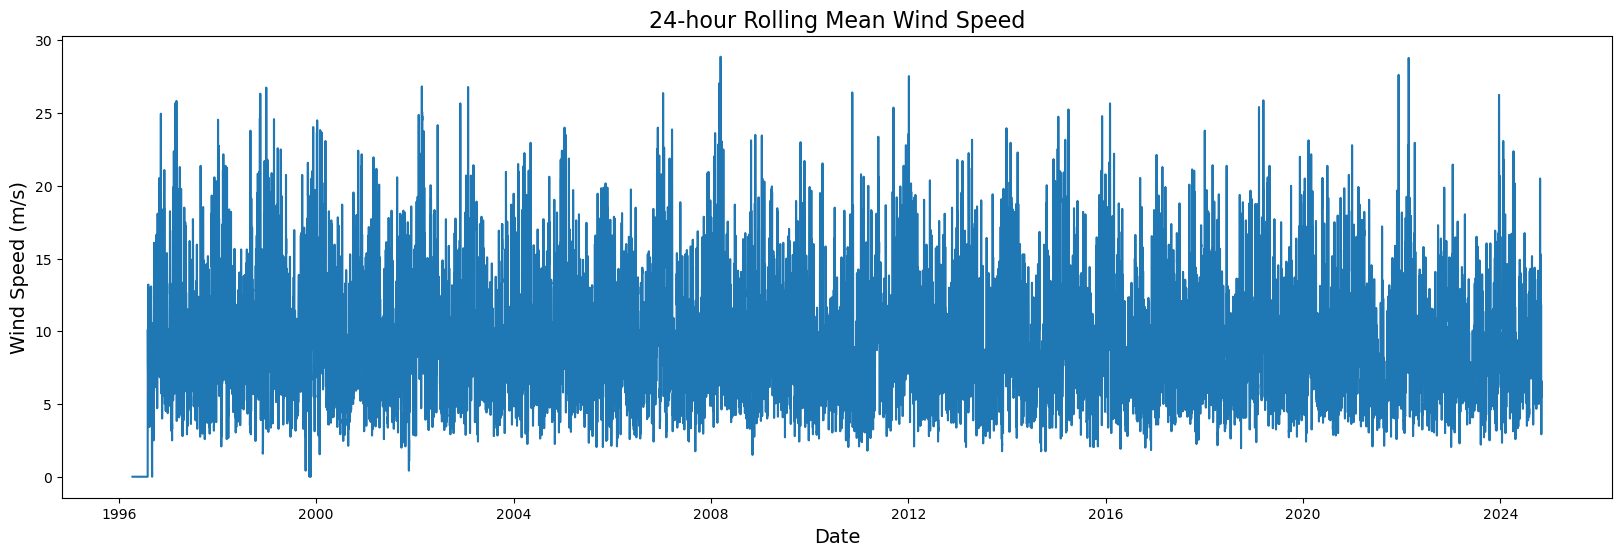

In [252]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=df.index, y=df['wdsp_rolling_24h'])
plt.title('24-hour Rolling Mean Wind Speed', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)

date
1996-04-10     0.0
1996-04-11     NaN
1996-04-12     NaN
1996-04-13     NaN
1996-04-14     NaN
              ... 
2024-10-28    14.0
2024-10-29     6.0
2024-10-30     9.0
2024-10-31     9.0
2024-11-01     6.0
Freq: D, Name: wdsp, Length: 10433, dtype: float64


Text(0, 0.5, 'Wind Speed (m/s)')

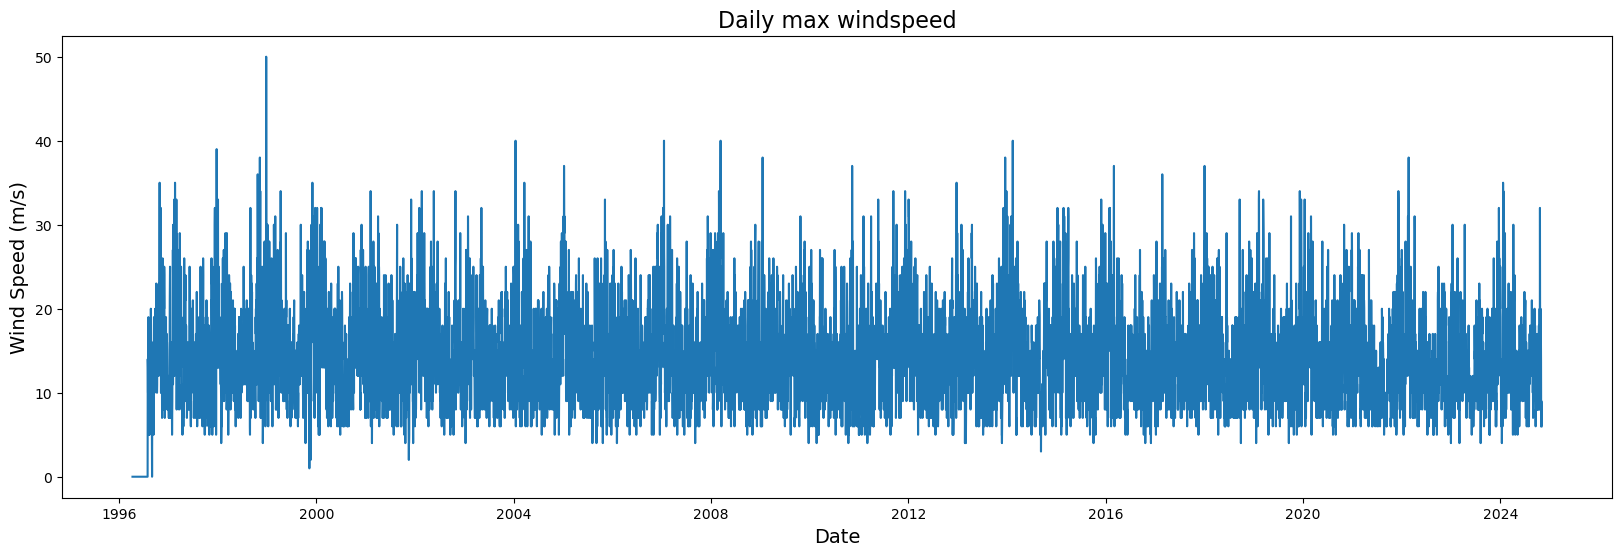

In [ ]:
daily_max_wdsp = df['wdsp'].resample('1D').max() # resampling the windspeed data set at daily intervals and picking the max of each day
print(daily_max_wdsp)
plt.figure(figsize=(20, 6))
sns.lineplot(x=daily_max_wdsp.index, y=daily_max_wdsp)
plt.title('Daily max windspeed', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)


The monthly mean of the daily max windspeeds